<a href="https://colab.research.google.com/github/Tdas-christ/Machine_Learning/blob/main/2348569_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATASETS/Market_Basket_Optimisation.csv')
df_original = pd.read_csv('/content/drive/MyDrive/DATASETS/Market_Basket_Optimisation.csv')

In [ ]:
df.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

shrimp                  0
almonds              1754
avocado              3112
vegetables mix       4156
green grapes         4972
whole weat flour     5637
yams                 6132
cottage cheese       6520
energy drink         6847
tomato juice         7106
low fat yogurt       7245
green tea            7347
honey                7414
salad                7454
mineral water        7476
salmon               7493
antioxydant juice    7497
frozen smoothie      7497
spinach              7498
olive oil            7500
dtype: int64

In [ ]:
df=df.drop(columns=['olive oil'])

In [ ]:
df=df.fillna(value=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   shrimp             7500 non-null   object
 1   almonds            7500 non-null   object
 2   avocado            7500 non-null   object
 3   vegetables mix     7500 non-null   object
 4   green grapes       7500 non-null   object
 5   whole weat flour   7500 non-null   object
 6   yams               7500 non-null   object
 7   cottage cheese     7500 non-null   object
 8   energy drink       7500 non-null   object
 9   tomato juice       7500 non-null   object
 10  low fat yogurt     7500 non-null   object
 11  green tea          7500 non-null   object
 12  honey              7500 non-null   object
 13  salad              7500 non-null   object
 14  mineral water      7500 non-null   object
 15  salmon             7500 non-null   object
 16  antioxydant juice  7500 non-null   object


ONE-HOT ENCODING FOR APRIORI ALGORITHM

In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.head()

,shrimp_almonds,shrimp_antioxydant juice,shrimp_asparagus,shrimp_avocado,shrimp_babies food,shrimp_bacon,shrimp_barbecue sauce,shrimp_black tea,shrimp_blueberries,shrimp_body spray,...,salmon_sparkling water,antioxydant juice_0,antioxydant juice_french fries,antioxydant juice_frozen smoothie,frozen smoothie_0,frozen smoothie_protein bar,frozen smoothie_spinach,spinach_0,spinach_cereals,spinach_mayonnaise
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0




**EXPLORATORY DATA ANALYSIS**

Product Popularity: Displaying the frequency of each product's purchases to identify the most popular items.


We find the sum of each attribute and sort it to visualize the top
10 product

In [ ]:
df.describe()

,shrimp_almonds,shrimp_antioxydant juice,shrimp_asparagus,shrimp_avocado,shrimp_babies food,shrimp_bacon,shrimp_barbecue sauce,shrimp_black tea,shrimp_blueberries,shrimp_body spray,...,salmon_sparkling water,antioxydant juice_0,antioxydant juice_french fries,antioxydant juice_frozen smoothie,frozen smoothie_0,frozen smoothie_protein bar,frozen smoothie_spinach,spinach_0,spinach_cereals,spinach_mayonnaise
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,...,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,0.001467,0.002400,0.000400,0.007600,0.000667,0.000800,0.000400,0.001200,0.000533,0.000133,...,0.000133,0.999600,0.000133,0.000267,0.999600,0.000267,0.000133,0.999733,0.000133,0.000133
std,0.038272,0.048934,0.019997,0.086852,0.025813,0.028275,0.019997,0.034623,0.023089,0.011547,...,0.011547,0.019997,0.011547,0.016329,0.019997,0.016329,0.011547,0.016329,0.011547,0.011547
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
product_popularity = df.sum()

In [ ]:
sorted_product_popularity = product_popularity.sort_values(ascending=False)

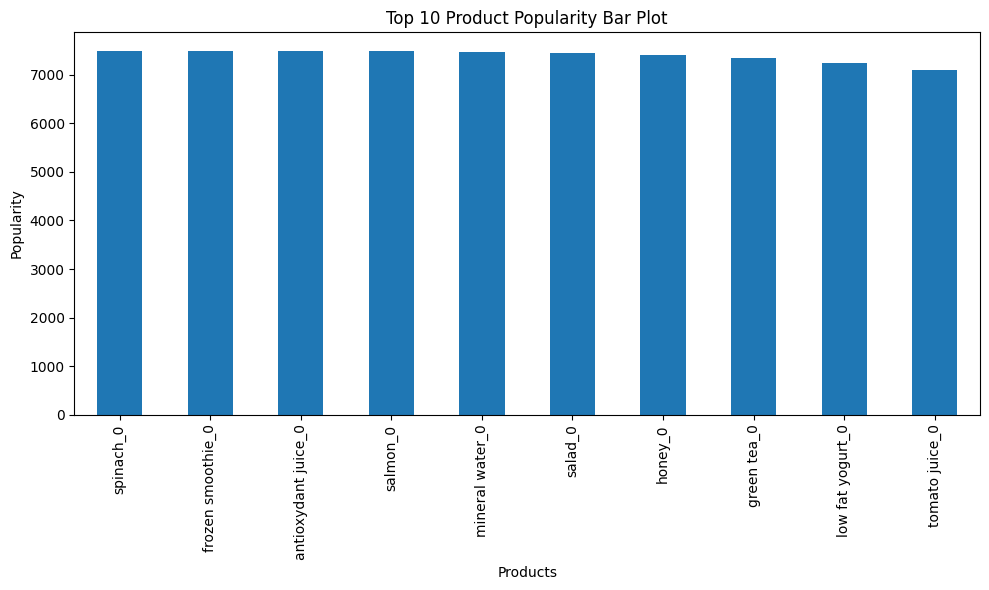

In [ ]:
top_n = 10
top_n_products = sorted_product_popularity[:top_n]

plt.figure(figsize=(10, 6))


top_n_products.plot(kind='bar')

plt.xlabel('Products')
plt.ylabel('Popularity')
plt.title(f'Top {top_n} Product Popularity Bar Plot')


plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


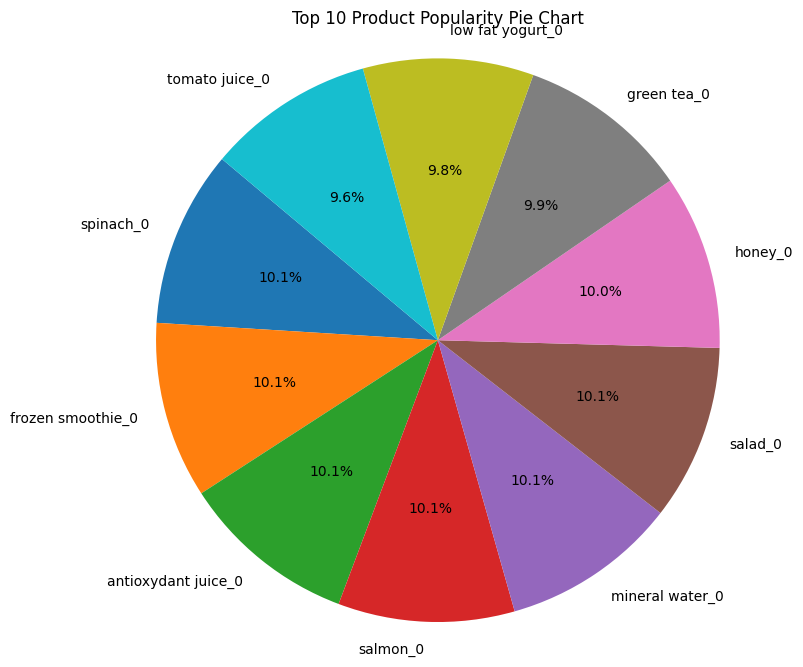

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(top_n_products, labels=top_n_products.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')

plt.title(f'Top {top_n} Product Popularity Pie Chart')

plt.show()

**APRIORI ALGORITHM AND ASSOCIATION MINING**

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
df1=df

In [ ]:
#the lambda function that checks whether each element x is greater than 0. If the condition is true, it returns True else False.
data = df1.applymap(lambda x: True if x > 0 else False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Find frequent itemsets with a minimum support threshold
min_support = 0.01
#checking frequent itemset with only the true values
frequent_itemsets = apriori(data, min_support=min_support, use_colnames=True)
print(frequent_itemsets)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calculate association rules with a minimum lift threshold
min_threshold = 1.0
#lift  is used to measure the significance of the relationship between items in a rule.
association_rules_df = association_rules(frequent_itemsets, metric='lift', min_threshold=min_threshold)
print(association_rules_df)

In [ ]:
association_rules_df['confidence'] = association_rules_df['support']  `` / association_rules_df['antecedent support']
association_rules_df = association_rules_df[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

print(association_rules_df)

In [ ]:
heatmap_data = association_rules_df.pivot(index='antecedents', columns='consequents', values='confidence')
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Association Rule Confidence Heatmap')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')

plt.show()

**CONFIDENCE AND SUPPORT VALUE HEATMAP**

In [ ]:
association_rules_df['antecedent support'] = association_rules_df['antecedents'].apply(
    lambda x: frequent_itemsets[frequent_itemsets['itemsets'] == x]['support'].values[0]
)
association_rules_df['confidence'] = association_rules_df['support'] / association_rules_df['antecedent support']

heatmap_data = association_rules_df.pivot(index='antecedents', columns='consequents', values=['support', 'confidence'])

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f')

plt.title('Association Rules Strength Heatmap')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')

plt.show()

In [ ]:
matrix_df = association_rules_df.pivot(index='antecedents', columns='consequents', values='confidence')

# Create the matrix plot
plt.figure(figsize=(10, 8))
plt.imshow(matrix_df, cmap='YlGnBu', aspect='auto')
plt.colorbar(label='Confidence')
plt.xticks(range(len(matrix_df.columns)), matrix_df.columns, rotation=90)
plt.yticks(range(len(matrix_df.index)), matrix_df.index)
plt.title('Cross-Selling Strategy Matrix')
plt.tight_layout()

plt.show()